## A classical feedforward network using the MLPClassifier.

### MLPClassifier using Iris Dataset


In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Load Iris dataset
data = load_iris()

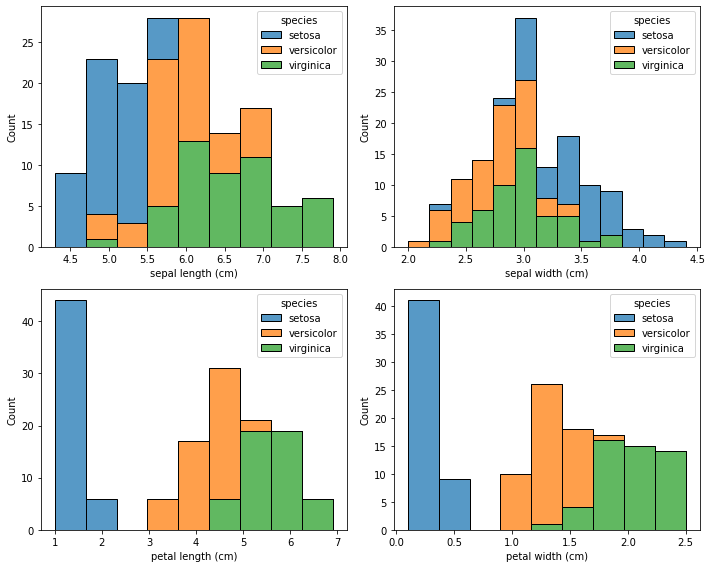

In [25]:
#Plot subplots of feature distributions
import seaborn as sns
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['species'] = pd.Categorical.from_codes(data.target, data.target_names)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=iris_df, x='sepal length (cm)', hue='species', multiple='stack', ax=axes[0, 0])
sns.histplot(data=iris_df, x='sepal width (cm)', hue='species', multiple='stack', ax=axes[0, 1])
sns.histplot(data=iris_df, x='petal length (cm)', hue='species', multiple='stack', ax=axes[1, 0])       
sns.histplot(data=iris_df, x='petal width (cm)', hue='species', multiple='stack', ax=axes[1, 1])
plt.tight_layout()
plt.show()  

In [26]:
X = data.data  # Features (sepal/petal length/width)

y = data.target  # Target labels (3 iris species)

In [27]:
# Split data into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Standardize features (critical for neural networks)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Initialize MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
    activation='relu',           # Rectified Linear Unit activation
    solver='adam',               # Stochastic gradient-based optimizer (adjust our gradient)
    alpha=0.001,                 # L2 regularization strength
    batch_size=32,               # Mini-batch size
    learning_rate='constant',    # Constant learning rate
    learning_rate_init=0.001,
    max_iter=500,                # Maximum training iterations
    random_state=42,
    early_stopping=True,         # Stop if validation score doesn't improve
    n_iter_no_change=10          # Max epochs without improvement
)

In [30]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, batch_size=32, early_stopping=True,
              hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [31]:
# MODEL EVALUATION

# Predict on test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=data.target_names))

Test Accuracy: 0.73
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.60      0.60      0.60        10
   virginica       0.60      0.60      0.60        10

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30



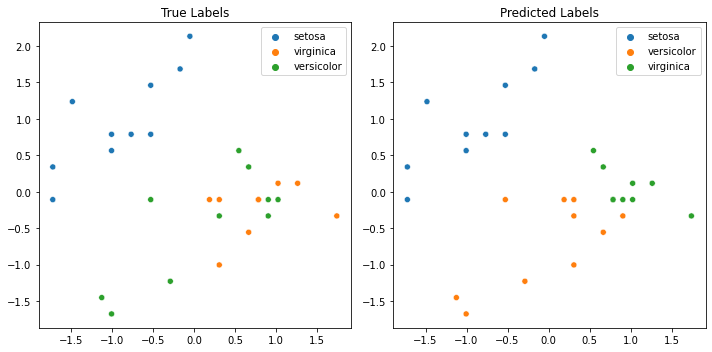

In [32]:
#Plot subplots of true vs predicted labels
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=data.target_names[y_test], ax=axes[0])
axes[0].set_title('True Labels')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=data.target_names[y_pred], ax=axes[1])
axes[1].set_title('Predicted Labels')
plt.tight_layout()
plt.show()

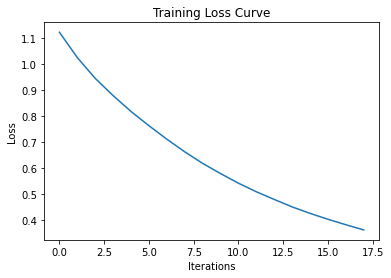

In [33]:
# Plotting training loss curve
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

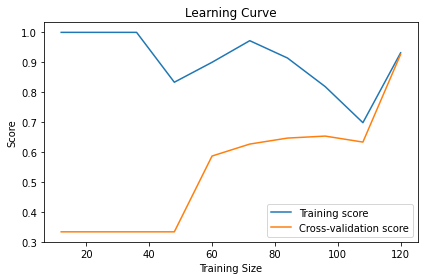

In [34]:
#Plot the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

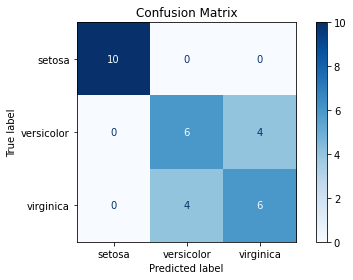

In [35]:
#Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, display_labels=data.target_names, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()